# RETAIL (Capstone Project 1)

### DESCRIPTION

It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).
Dataset Description

This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

Variables	Description
InvoiceNo	Invoice number. Nominal, a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation
StockCode	Product (item) code. Nominal, a five digit integral number uniquely assigned to each distinct product
Description	Product (item) name. Nominal
Quantity	The quantities of each product (item) per transaction. Numeric
InvoiceDate	Invoice Date and time. Numeric, the day and time when each transaction was generated
UnitPrice	Unit price. Numeric, product price per unit in sterling
CustomerID	Customer number. Nominal, a six digit integral number uniquely assigned to each customer
Country	Country name. Nominal, the name of the country where each customer resides
 

### Project Task: Week 1

1. Data Cleaning:

- Perform a preliminary data inspection and data cleaning.
- Check for missing data and formulate an apt strategy to treat them.
- Remove duplicate data records.
- Perform descriptive analytics on the given data.

2. Data Transformation:

- Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts. 
- Create month cohorts and analyze active customers for each cohort.
- Analyze the retention rate of customers.

3. Data Modeling :

- Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.
- Calculate RFM metrics.
- Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.
- Combine three ratings to get a RFM segment (as strings).
- Get the RFM score by adding up the three ratings.
- Analyze the RFM segments by summarizing them and comment on the findings.

Note: 
- Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.
- Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money.

### Project Task: Week 2

4. Data Modeling :
- Create clusters using k-means clustering algorithm.
- Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.
- Decide the optimum number of clusters to be formed.
- Analyze these clusters and comment on the results.

5. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 

- Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures
- Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold
- Bar graph to show the count of orders vs. hours throughout the day
- Plot the distribution of RFM values using histogram and frequency charts
- Plot error (cost) vs. number of clusters selected
- Visualize to compare the RFM values of the clusters using heatmap

### Importing some of the required libraries

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset 

In [212]:
retail_data=pd.read_excel('Online Retail.xlsx')
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [213]:
retail_data.shape

(541909, 8)

The dataset consists of **541909** records with **8** features

## 1. Data Cleaning:

The dataset consists of **'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', and 'Country'** features.Out of these columns we can remove **'Description'** column because this column does not provide any contribution to our model.

In [214]:
df=retail_data.drop(columns='Description')
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### a. Checking for missing values in the dataset

In [215]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

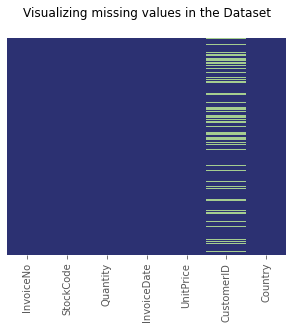

In [216]:
plt.figure(figsize=(5,4))
sns.heatmap(df.isnull(),cmap="crest_r",yticklabels=False,cbar=False)
plt.title('Visualizing missing values in the Dataset\n', fontsize = 12)
plt.xticks(rotation='vertical')
plt.show()

In [217]:
print('The Percentage of missing values in the dataset = {}%'
      .format(round((df['CustomerID'].isnull().sum()/df.shape[0])*100,2)))

The Percentage of missing values in the dataset = 24.93%


The **CustomerID** feature has **135080** missing values in it.Since we are performing **customer segmentation** our analysis is mainly centered around Customers CustomerID feature hence replacing these records containing missing values with mean/median imputation will not be a good idea.So lets check for the possible ways to impute these missing values by comparing **InvoiceNo feature with records having missing CustomerId**.

In [218]:
unique_invoiceno=set(df[df['CustomerID'].isnull()]['InvoiceNo'])
unique_invoiceno

{540673,
 540674,
 540675,
 540676,
 540677,
 540678,
 540679,
 540681,
 'C544049',
 540683,
 540684,
 540685,
 540693,
 540694,
 540695,
 540696,
 548886,
 548887,
 540699,
 548888,
 548889,
 548890,
 548893,
 548894,
 548895,
 548897,
 565275,
 548901,
 565286,
 565288,
 573482,
 573487,
 565296,
 565297,
 573488,
 573489,
 557108,
 573490,
 565302,
 565303,
 557112,
 565304,
 565306,
 565307,
 565308,
 573493,
 565310,
 573494,
 573495,
 573497,
 565314,
 573498,
 573499,
 573503,
 573505,
 565319,
 548945,
 557137,
 557138,
 557139,
 557140,
 'C572448',
 557151,
 565346,
 573540,
 540778,
 573547,
 548977,
 573553,
 548980,
 565368,
 565369,
 548986,
 565370,
 565371,
 548989,
 565376,
 548994,
 565378,
 548996,
 548997,
 548998,
 548999,
 549000,
 549001,
 549002,
 'C548605',
 549003,
 549004,
 549005,
 549006,
 549008,
 549009,
 549010,
 549011,
 'C552203',
 540821,
 565389,
 565396,
 565400,
 573585,
 573589,
 573590,
 540828,
 573591,
 573592,
 549023,
 540832,
 540833,
 573593

In [219]:
df[df['InvoiceNo'].isin(unique_invoiceno) & ~df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


On comparing customers InvoiceNo  with CustomerID we did not find any other same InvoiceNo's from the customers having missing CustomerID's.So lets drop the records with missing CustomerID.

In [220]:
df.dropna(inplace=True)

In [221]:
df.isnull().sum().sum()

0

### b. Checking for duplicate records in the dataset

In [222]:
df.duplicated().sum()

5227

There are **5227 duplicate records** in the dataset.Lets remove them!

In [223]:
df.drop_duplicates(inplace=True)

In [224]:
df.shape

(401602, 7)

In [225]:
df.dtypes

InvoiceNo              object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Lets change CustomerID to object because CustomerID will not be numeric in most of the cases

In [226]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [227]:
df['CustomerID'].dtype

dtype('O')

### c. Descriptive Analysis

In [228]:
df.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
Quantity,401602.0,12.182579,-80995.0,2.0,5.0,12.0,80995.0,250.283248
InvoiceDate,401602,2011-07-10 12:08:08.129839872,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-29 15:40:00,2011-10-20 11:58:00,2011-12-09 12:50:00,NaN
UnitPrice,401602.0,3.474064,0.0,1.25,1.95,3.75,38970.0,69.764209


In [229]:
df.describe(include='O').T

,count,unique,top,freq
InvoiceNo,401602,22190,576339,542
StockCode,401602,3684,85123A,2065
CustomerID,401602,4372,17841.0,7812
Country,401602,37,United Kingdom,356726


From the above **Descriptive statistics** we find that,
- The company has customers across 37 Countries and most of the customers are from United Kingdom.
- The company has a total of 4372 unique customers among them a customer with CustomerID 17841.0 has done the most purchases.
- There are 3684 unique StockCodes which means that there are 3684 unique products in total and the product with StockCode 85123A is the most frequently purchased product.
- Out of 401602 Invoices we have 22190 unique invoices which implies 22190 unique transactions has been done.
- From the UnitPrice feature we can notice that each product in the transaction costs an avg of 3.47 sterling.
- From the InvoiceDate we see that we have transactional data from 1st december 2010 to 9th december 2011
- we also notice negative values in the Quantity feature which indicates that some of the customers has returned the products. 

## 2. Data Transformation

### Cohort analysis

**Assigning the cohorts and calculating the monthly offset**

In [230]:
# Creating a function that will parse the date Time based cohort:  1 day of month
import datetime as dt
def get_month(x) : 
    return dt.datetime(x.year,x.month,1)

In [231]:
#Creating InvoiceMonth column from InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
#Grouping by CustomerId and selecting the InvoiceMonth 
grouping = df.groupby('CustomerID')['InvoiceMonth']
# Assigning a minimum InvoiceMonth to the dataset
df['CohortMonth'] = grouping.transform('min')
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


**Calculating time offset in Month as Cohort Index**

In [232]:
def get_month_int (df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year,month,day 

#Getting the integers for date parts from the 'InvoiceDay' column
invoice_year,invoice_month,_ = get_month_int(df,'InvoiceMonth')
#Getting the integers for date parts from the 'CohortDay' column
cohort_year,cohort_month,_ = get_month_int(df,'CohortMonth')
#Calculating the difference in years
year_diff = invoice_year - cohort_year 
#Calculating the difference in months
month_diff = invoice_month - cohort_month 

df['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [233]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [234]:
#Counting the monthly active customers from each cohort
grouping = df.groupby(['CohortMonth','CohortIndex'])
#Counting number of unique CustomerId's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341


**Calculating Retention rate**

In [235]:
#Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
cohort_size = cohort_counts.iloc[:,0]
retention_rate = cohort_counts.divide(cohort_size,axis=0) # axis=0 to divide along the row axis 
# Coverting the retention rate into percentage and Rounding off.
retention_rate.round(2) * 100 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.0,33.0,39.0,36.0,40.0,38.0,35.0,35.0,39.0,37.0,50.0,27.0
2011-01-01,100.0,24.0,28.0,24.0,33.0,30.0,26.0,26.0,31.0,35.0,37.0,15.0,NaN
2011-02-01,100.0,25.0,19.0,28.0,27.0,25.0,26.0,28.0,26.0,31.0,9.0,NaN,NaN
2011-03-01,100.0,19.0,25.0,22.0,23.0,18.0,26.0,24.0,29.0,9.0,NaN,NaN,NaN
2011-04-01,100.0,23.0,22.0,21.0,21.0,24.0,23.0,26.0,8.0,NaN,NaN,NaN,NaN
2011-05-01,100.0,24.0,17.0,17.0,22.0,24.0,27.0,10.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,21.0,19.0,27.0,25.0,34.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,21.0,20.0,23.0,27.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.0,25.0,25.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Customer retention is a very useful metric to understand how many of the customers are still active out of all the customers.Retention actually gives you the percentage of active customers compared to the total number of customers.

The above retention rate dataframe represents Customer retained across Cohorts.We can read it as follows:
- Index value represents the Cohort
- Columns represent the number of months since the current Cohort
- For instance - The value at CohortMonth 2011-01-01, CohortIndex 5 is 33.0 and represents 33% of customers from cohort 2011-01 were retained in the 5th Month.

Also, we can notice from the retention Rate DataFrame:
- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
- The retention rate may increase or decrease in subsequent Indexes.
- Values towards the bottom right have a lot of NaN values.

**Visualizing the Retention rate**

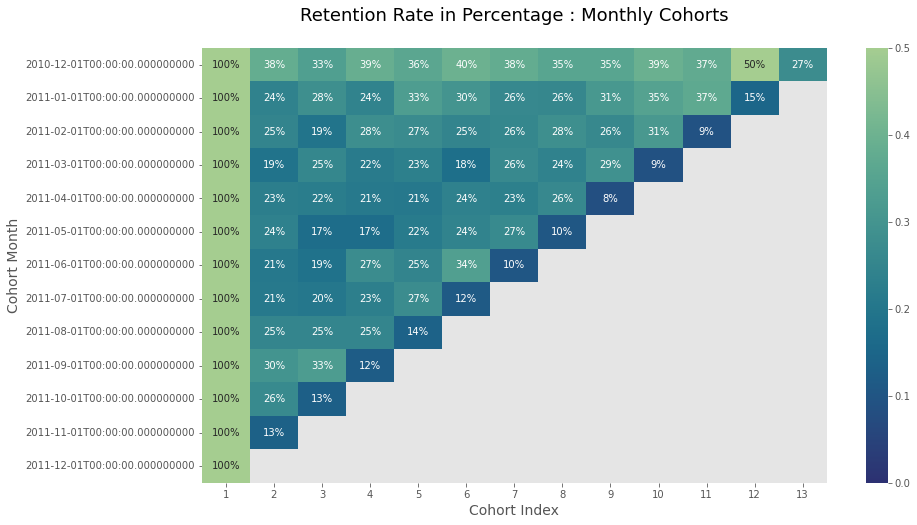

In [237]:
#Creating the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(retention_rate, annot = True,vmin = 0.0, vmax =0.5,cmap="crest_r", fmt='.0%')
plt.title('Retention Rate in Percentage : Monthly Cohorts\n', fontsize = 18)
plt.ylabel('Cohort Month',fontsize = 14)
plt.xlabel('Cohort Index',fontsize = 14)
plt.show()

**Average quantity for each cohort**

In [238]:
grouping1 = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data1 = grouping1['Quantity'].mean()
cohort_data1 = cohort_data1.reset_index()
average_quantity = cohort_data1.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(2)
average_quantity.index = average_quantity.index.date

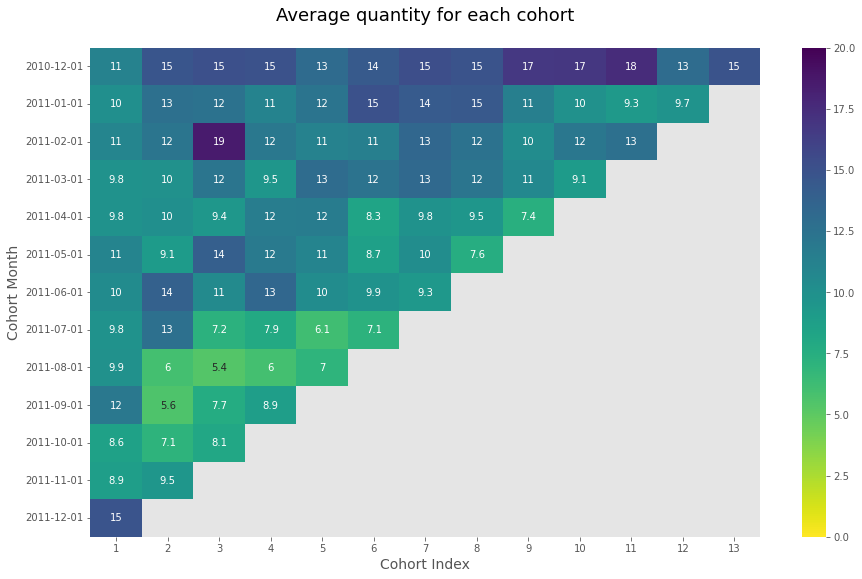

In [239]:
#Creating the heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(average_quantity, annot = True,vmin = 0.0, vmax =20,cmap="viridis_r")
plt.title('Average quantity for each cohort\n', fontsize = 18)
plt.ylabel('Cohort Month',fontsize = 14)
plt.xlabel('Cohort Index',fontsize = 14)
plt.show()

## 3. Data Modelling

### a. Building a RFM (Recency Frequency Monetary) model

**RFM**
- **Recency :** The freshness of the customer activity be it purchases or visits (or) Recency means the number of days since a customer made the last purchase
- **Frequency :** The frequency of the customer transactions or visits (or) Frequency is the number of purchase in a given period. It could be 3 m onths, 6 m onths or 1 year.
- **Monetary :** The intension of customer to spend or purchasing power of customer (or) Monetary is the total amount of money a customer spent in that given period. 
Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP

The RFM values can be grouped in several ways:
1. Percentiles 
2. Pareto (80/20)
3. Custom - based on business knowledge

**Lets implement Percentile based grouping To calculate percentiles:**
1. Sort customers based on that metric
2. Break customers into a pre-defined number of groups of equal size
3. Assign a label to each group

In [240]:
#Calculating Totalamount
df['TotalAmount'] = df['UnitPrice']* df['Quantity']
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalAmount
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34


In [241]:
print('Min Invoice Date:{}\nMax Invoice Date:{}'.format(df.InvoiceDate.dt.date.min(),df.InvoiceDate.dt.date.max()))

Min Invoice Date:2010-12-01
Max Invoice Date:2011-12-09


In [242]:
#In the real world, we will be working with the most recent snapshot of the data of today or yesterday 
# so lets count different days with snapshot_date.
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

### b. Calculating RFM metrics

In [243]:
#lambda function used below gives the number of days between hypothetical today and the last transaction
rfm = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (snapshot_date - x.max()).days,
                                      'InvoiceNo':'count','TotalAmount': 'sum'})
#lets rename the columns
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalAmount':'Monetary'}
           ,inplace= True)

#Final RFM values
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


**NOTE :**
- We will rate "Recency" customers who have been active more recently better than the less recent customer,because each company wants its customers to be recent.
- We will also rate "Frequency" and "Monetary" higher label because we want Customer to spend more money and visit more often.

### c.  Building RFM Segments, and producing recency, frequency, and monetary scores individually by dividing them into quartiles

In [246]:
#Building RFM segments
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['Monetary'],q=4,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

#Combining three ratings to get a RFM segment (as strings)
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )

#Getting the RFM score by adding up the three ratings
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

#displaying the dataframe which has a row for each customer with their RFM
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


### c. Analyzing the RFM segments 

In [247]:
#It is always the best practice to investigate the size(largest RFM segments) of the segments 
#before we use them for targeting or for other business Applications.
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)[:5]

RFM_Segment
444    470
111    393
344    210
122    204
211    181
dtype: int64

#### Summary metrics per RFM Score

In [248]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean',
                             'Monetary': ['mean', 'count'] }).round(2)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3          264.75      7.85   109.25   393
4          174.88     13.79   226.57   390
5          152.50     20.92   342.69   515
6           94.59     28.11   490.78   469
7           79.49     39.22   722.68   439
8           62.76     56.08   965.48   467
9           44.37     77.38  1341.58   413
10          31.52    112.60  1819.18   442
11          20.47    190.42  3890.65   374
12           6.71    367.72  8848.13   470

**Using RFM score lets group the customers into different segements like Gold, Silver and Bronze segments**

In [249]:
def segments(df):
    if df['RFM_Score'] > 9 :
        return 'Gold'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):
        return 'Silver'
    else:  
        return 'Bronze'

In [250]:
rfm['Customer_Segment'] = rfm.apply(segments,axis=1)
rfm.groupby('Customer_Segment').agg({'Recency':'mean','Frequency':'mean',
                                    'Monetary':['mean','count']}).round(2)

Recency Frequency Monetary      
                    mean      mean     mean count
Customer_Segment                                 
Bronze            193.21     14.82   237.12  1298
Gold               19.24    228.47  4990.52  1286
Silver             70.97     49.52   868.22  1788

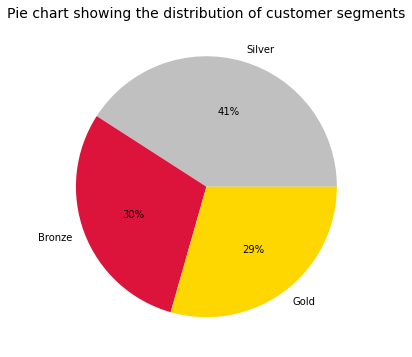

In [251]:
plt.figure(figsize=(12,6))
plt.pie(rfm['Customer_Segment'].value_counts(),labels=rfm['Customer_Segment'].value_counts().index,
        autopct='%.0f%%',colors=['silver','crimson','gold'])
plt.title('Pie chart showing the distribution of customer segments',fontsize=14)
plt.show()

### d. Create clusters using K-means clustering algorithm 

**Preparing the data to implement algorithm**

Lets check some of the assumptions before we implement our Kmeans Clustering algorithm
- Symmetric distribution of variables (not skewed)
- Variables with same mean
- Variables with same variance

In [252]:
RFM=rfm[['Recency','Frequency','Monetary']]
RFM.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4372.0,92.047118,100.765435,1.00,17.000,50.00,143.000,374.00
Frequency,4372.0,91.857731,229.223553,1.00,17.000,41.00,99.250,7812.00
Monetary,4372.0,1893.405209,8218.228204,-4287.63,291.795,644.07,1608.335,279489.02


From the above RFM Descriptive statistics we observe that the **mean and variance are in different scales**,hence to overcome this problem we shall apply Scaling for variables to standardize the data.

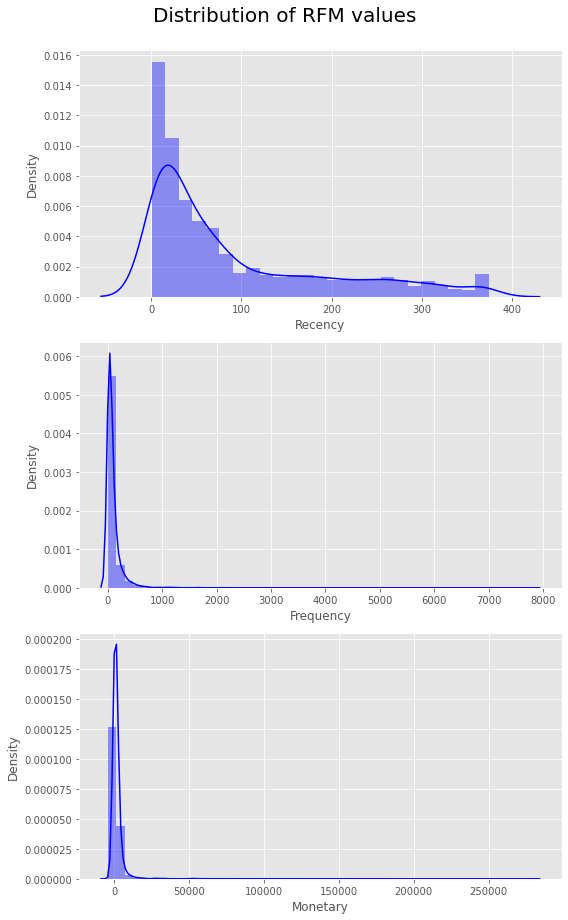

In [253]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(8,13))
plt.suptitle('Distribution of RFM values\n',fontsize=20)
plt.subplot(311)
sns.distplot(RFM.Recency, label = 'Recency',color='b')
plt.subplot(312)
sns.distplot(RFM.Frequency, label = 'Frequency',color='b')
plt.subplot(313)
sns.distplot(RFM.Monetary, label = 'Monetary',color='b')
plt.style.context('fivethirtyeight')
plt.tight_layout()
plt.show()

From the above distribution plots we see that the variables are not Symmetrically distributed(i.e., data is skewed) hence we have to manage the skewness with appropriate transformation.

#### Lets Apply log Transformation to unskew the variables 

In [254]:
rfm_log = RFM[['Recency', 'Frequency']].apply(np.log, axis = 1).round(2)
# Note: we can't take the log of -ve numbers.
#from the descriptive statistics we found that 'Monetary' variable has -ve values in it 
#hence we do some mathematical changes to make them +ve
rfm_log['Monetary'] = (RFM['Monetary']-RFM['Monetary'].min()+1).apply(np.log, axis = 1).round(2) 

In [255]:
rfm_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.79,0.69,8.36
12347.0,0.69,5.20,9.06
12348.0,4.32,3.43,8.71
12349.0,2.94,4.29,8.71
12350.0,5.74,2.83,8.44


In [256]:
rfm_log.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4372.0,3.732223,1.464554,0.0,2.83,3.91,4.9600,5.92
Frequency,4372.0,3.675672,1.335948,0.0,2.83,3.71,4.6025,8.96
Monetary,4372.0,8.615762,0.363824,0.0,8.43,8.50,8.6800,12.56


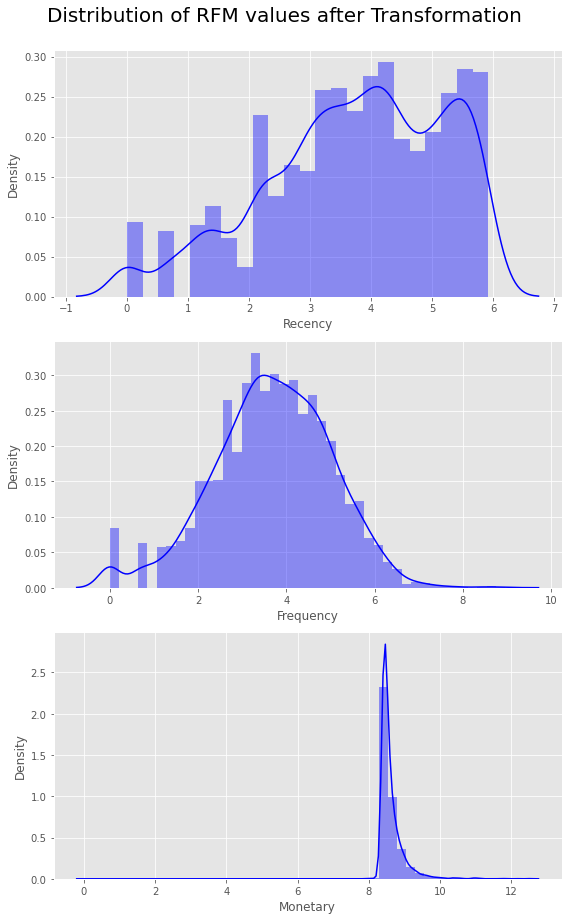

In [257]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(8,13))
plt.suptitle('Distribution of RFM values after Transformation\n',fontsize=20)
plt.subplot(311)
sns.distplot(rfm_log.Recency, label = 'Recency',color='b')
plt.subplot(312)
sns.distplot(rfm_log.Frequency, label = 'Frequency',color='b')
plt.subplot(313)
sns.distplot(rfm_log.Monetary, label = 'Monetary',color='b')
plt.style.context('fivethirtyeight')
plt.tight_layout()
plt.show()

### Implementation of K-Means Clustering Algorithm

> **Data PreProcessing**

In [258]:
#Standarizing the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
rfm_normalized= scaler.transform(rfm_log)

> **Choosing the Number of Clusters**

**Using Elbow method :**

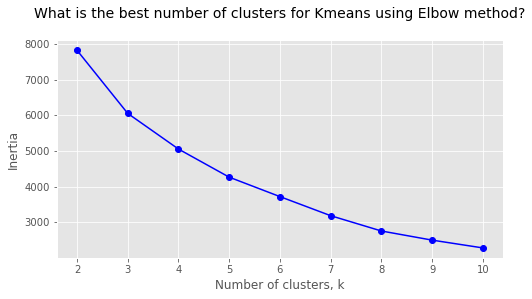

In [259]:
from sklearn.cluster import KMeans
# Finding the Optimal Number of Clusters with the help of Elbow Curve
# First : Get the Best KMeans 
range_n_clusters = range(2,11)
inertias=[]
for k in range_n_clusters :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1,max_iter=50)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(8,4))
plt.plot(range_n_clusters , inertias, '-o',color='b')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.title('What is the best number of clusters for Kmeans using Elbow method?\n',fontsize=14)
plt.show()

In the above plot y axis represents **Inertia** which is the sum of squared distances of samples to their closest cluster centre and x axis represents the Number of cluster.
Based on the observation,the **k-value of 3** is the best hyperparameter for our model because the next k-value tend to have a linear trend.

In [260]:
# Creating a dataframe for exporting to create visualization in tableau later!
df_inertia = pd.DataFrame(list(zip(range_n_clusters, inertias)), columns=['clusters', 'intertia'])
df_inertia

,clusters,intertia
0,2,7829.819111
1,3,6056.792083
2,4,5055.953421
3,5,4266.736276
4,6,3720.831491
5,7,3185.333092
6,8,2755.271136
7,9,2498.757205
8,10,2279.985651


**Using Silhouette Analysis :**

In [261]:
# Lets also find the Optimal Number of Clusters with the help of Silhouette Analysis
from sklearn.metrics import silhouette_score
range_n_clusters = range(3,11)
for num_clusters in range_n_clusters:    
    kmeans = KMeans(n_clusters=num_clusters,random_state=1,max_iter=50)
    kmeans.fit(rfm_normalized)    
    cluster_labels = kmeans.labels_    
    silhouette_avg = silhouette_score(rfm_normalized, cluster_labels)
    print("For {0} clusters,the silhouette score is {1}".format(num_clusters, silhouette_avg))

For 3 clusters,the silhouette score is 0.3481717159163553
For 4 clusters,the silhouette score is 0.3015186069674956
For 5 clusters,the silhouette score is 0.2997450778586549
For 6 clusters,the silhouette score is 0.29354665467502505
For 7 clusters,the silhouette score is 0.295060959154092
For 8 clusters,the silhouette score is 0.3067768527176323
For 9 clusters,the silhouette score is 0.29667677045214796
For 10 clusters,the silhouette score is 0.29656278801153885


From the above analysis we see that the silhouette score is maximized at k = 3 so from this analysis also we find that selecting  **3 as the optimum number of clusters** will be better for our model!

**Applying Kmeans Clustering**

In [262]:
# clustering
kc = KMeans(n_clusters= 3,random_state=1,max_iter=50)
kc.fit(rfm_normalized)

#Create a cluster label column in the original DataFrame
cluster_labels = kc.labels_

#Calculating the average RFM values and size for each cluster:
rfm_k3= RFM.assign(K_Cluster = cluster_labels)

#Calculating the average RFM values and sizes for each cluster:
rfm_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'Monetary': ['mean', 'count'],}).round(2)

Recency Frequency  Monetary      
             mean      mean      mean count
K_Cluster                                  
0          163.95     21.71    425.20  2025
1           13.08    409.90  11370.38   426
2           33.76     95.28   1339.48  1921

In [263]:
rfm['K_Cluster']=kc.labels_
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Customer_Segment,K_Cluster
CustomerID,,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3,Bronze,0
12347.0,2,182,4310.00,4,4,4,444,12,Gold,1
12348.0,75,31,1797.24,2,2,4,224,8,Silver,0
12349.0,19,73,1757.55,3,3,4,334,10,Gold,2
12350.0,310,17,334.40,1,1,2,112,4,Bronze,0


**Statistical Summary for RFM Quantiles**

In [264]:
rfm.groupby('Customer_Segment').agg({'Recency':['mean','min','max'],
                           'Frequency':['mean','min','max'],
                           'Monetary':['mean','min','max']})

Recency            Frequency               Monetary  \
                        mean min  max        mean min   max         mean   
Customer_Segment                                                           
Bronze            193.211094  18  374   14.821263   1    84   237.120394   
Gold               19.241835   1  140  228.471229  20  7812  4990.515521   
Silver             70.971477   1  374   49.524609   1   526   868.222787   

                                      
                      min        max  
Customer_Segment                      
Bronze           -4287.63    1517.88  
Gold               294.25  279489.02  
Silver             -17.45   21535.90

**Statistical Summary for Kmeans**

In [265]:
rfm.groupby('K_Cluster').agg({'Recency':['mean','min','max'],
                           'Frequency':['mean','min','max'],
                           'Monetary':['mean','min','max']})

Recency            Frequency                Monetary  \
                 mean min  max        mean min   max          mean   
K_Cluster                                                            
0          163.949136   3  374   21.707160   1   155    425.204327   
1           13.082160   1  267  409.896714   9  7812  11370.375188   
2           33.763665   1  315   95.277980   2   615   1339.484113   

                                    
                    min        max  
K_Cluster                           
0         -4.287630e+03    7092.06  
1          1.863760e+03  279489.02  
2          1.776357e-15    6977.04

In [266]:
rfm_normalized = pd.DataFrame(rfm_normalized,index=RFM.index,columns=RFM.columns)
rfm_normalized['K_Cluster'] = kc.labels_
rfm_normalized['Customer_Segment'] = rfm['Customer_Segment']
rfm_normalized.reset_index(inplace = True)

#Melt the data into a long format so RFM values and metric names are stored in 1 column each
rfm_melt = pd.melt(rfm_normalized,id_vars=['CustomerID','Customer_Segment','K_Cluster'],
                   value_vars=['Recency', 'Frequency', 'Monetary'],
var_name='Metric',value_name='Value')
rfm_melt.head()

,CustomerID,Customer_Segment,K_Cluster,Metric,Value
0,12346.0,Bronze,0,Recency,1.405214
1,12347.0,Gold,1,Recency,-2.077473
2,12348.0,Silver,0,Recency,0.401381
3,12349.0,Gold,2,Recency,-0.540993
4,12350.0,Bronze,0,Recency,1.371070


**Visualization using Snake Plots** 

Snake Plots describes the summarized table visually

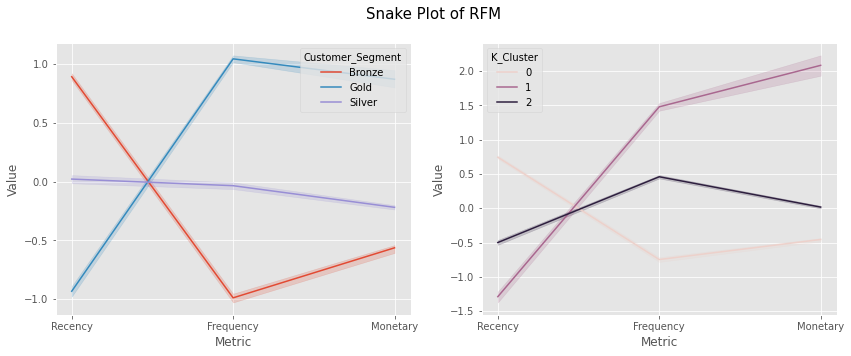

In [267]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
# Snake plots with RFM Quantiles
sns.lineplot(x = 'Metric', y = 'Value',hue ='Customer_Segment',data = rfm_melt,ax=ax1)
# Snake plots with K-Means
sns.lineplot(x = 'Metric', y = 'Value',hue = 'K_Cluster', data = rfm_melt,ax=ax2)
plt.suptitle("Snake Plot of RFM",fontsize=15) 
plt.show()

On Comparing the Snakeplots based on RFM Quantiles and Kmeans we observe that both the plots almost looks similar to each other,Which means both the segmentations has lead to similar kind of results.

**Relative importance of segment attributes**
- Useful technique to identify relative importance of each segment's attribute
- Calculate average values of each cluster
- Calculate average values of population
- Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average)

**Let’s also try with heatmaps. Heat maps are a graphical representation of data where larger values were colored in darker scales and smaller values in lighter scales. We can compare the variance between the groups quite intuitively by colors**.

In [268]:
# the farther the ratio is from 0, the more important that attribute is for a segment relative to the total population
cluster_avg = rfm_k3.groupby(['K_Cluster']).mean()
population_avg = RFM.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary
K_Cluster,,,
0,0.78,-0.76,-0.78
1,-0.86,3.46,5.01
2,-0.63,0.04,-0.29


In [270]:
#the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
# calculating the proportional gap with total mean
cluster_avg = rfm.groupby('Customer_Segment').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
prop_rfm.round(2)

,Recency,Frequency,Monetary
Customer_Segment,,,
Bronze,1.10,-0.84,-0.87
Gold,-0.79,1.49,1.64
Silver,-0.23,-0.46,-0.54


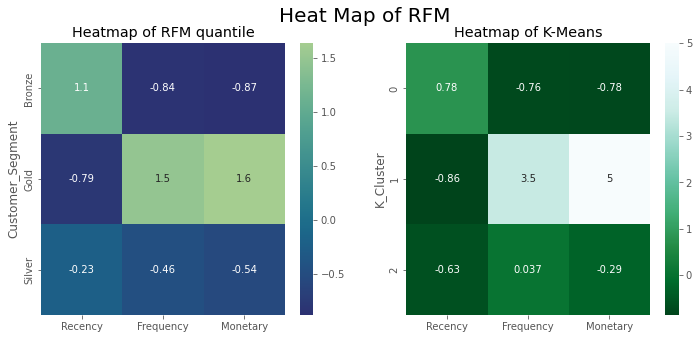

In [271]:
# heatmap of RFM Quantiles
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(data=prop_rfm, cmap= 'crest_r',annot = True,ax=ax1)
ax1.set(title = "Heatmap of RFM quantile")
# heatmap with Kmeans
sns.heatmap(data=relative_imp, annot=True, cmap='BuGn_r', ax=ax2)
ax2.set(title = "Heatmap of K-Means")
plt.suptitle("Heat Map of RFM\n",fontsize=20) 
plt.show()

## Conclusion :

We made two kinds of segmentation with RFM quantiles and K-Means clustering methods.

**By Observing the above Snake plots and Heatmaps,we got to know how each segment differ from each other.**
- We infer that Customers in **Cluster 0 (or) Bronze segment** are less frequent buyers,spending low amount and also they have not purchased anything in recent times, hence they will be considered as **least important customers**.
- Then the Customers in **Cluster 1 (or) Gold segment** are the most frequent buyers, spending high amount and are also placed orders recently so they will be considered as the **most important customers**.
- Finally the Customers in **Cluster 2 (or) Silver segment** are the customers having Recency, Frequency, and Monetary value in the medium range ,hence they will also be considered as **important customers**.

## 4. Data Reporting

**1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business.**
The dashboard must entail the following: 
1. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures
2. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold
3. Bar graph to show the count of orders vs. hours throughout the day
4. Plot the distribution of RFM values using histogram and frequency charts
5. Plot error (cost) vs. number of clusters selected
6. Visualize to compare the RFM values of the clusters using heatmap

Saving the Data into excel to use it in Tableau to create a Dashboard

In [272]:
writer = pd.ExcelWriter(r'C:\Users\Sudhakar\Simplilearn Capstone Project\Project 3\RetailOutputData.xlsx',
                        engine='xlsxwriter')
df.to_excel(writer, sheet_name='Retail_data', index=False)
rfm.to_excel(writer, sheet_name='rfm_data', index=False)
rfm_melt.to_excel(writer, sheet_name='rfm_melt', index=False)
df_inertia.to_excel(writer, sheet_name='inertia', index=False)
writer.save()

**Please refer the below link for Data Reporting :
https://public.tableau.com/app/profile/divya.reddy7718/viz/RetailCapstoneProjectDataReporting/Dashboard1**

### Screenshots of worksheets from Tableau

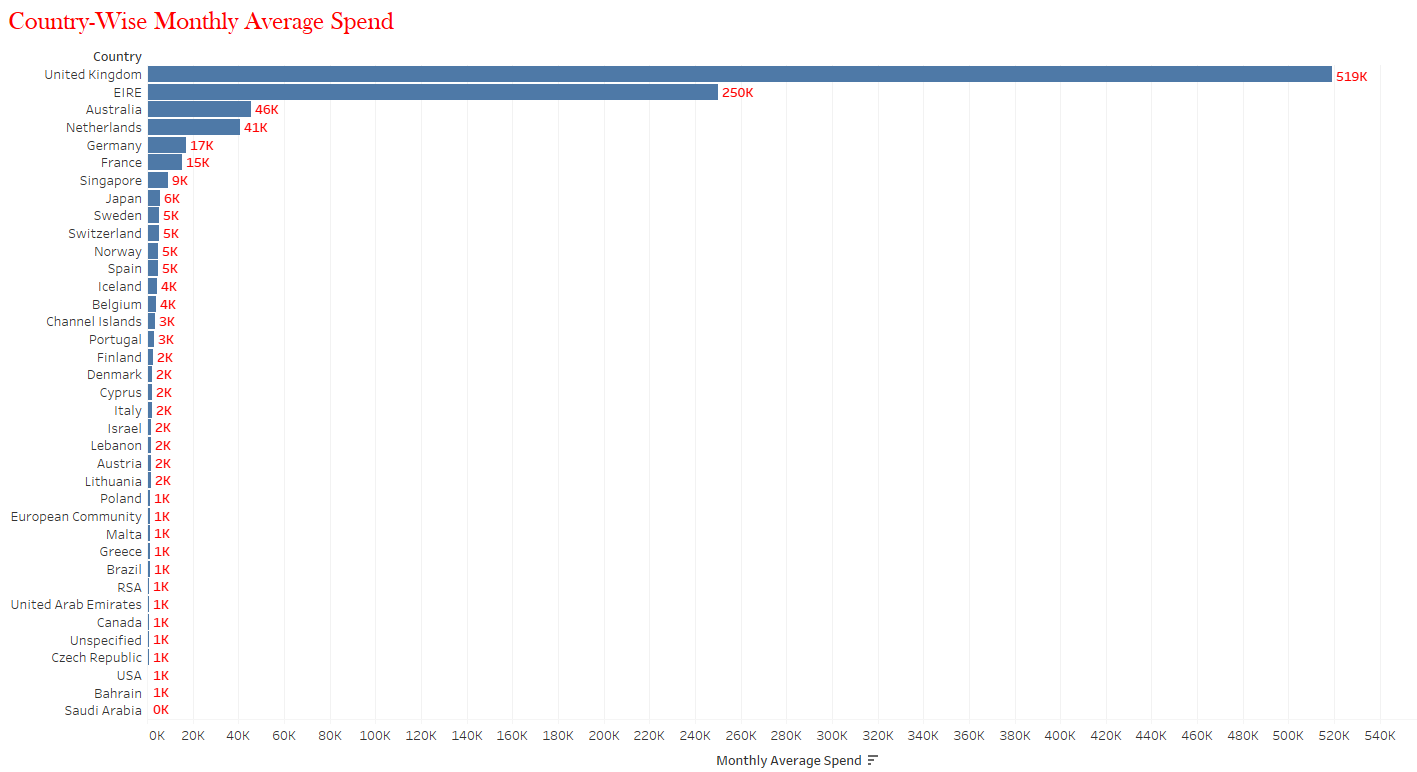

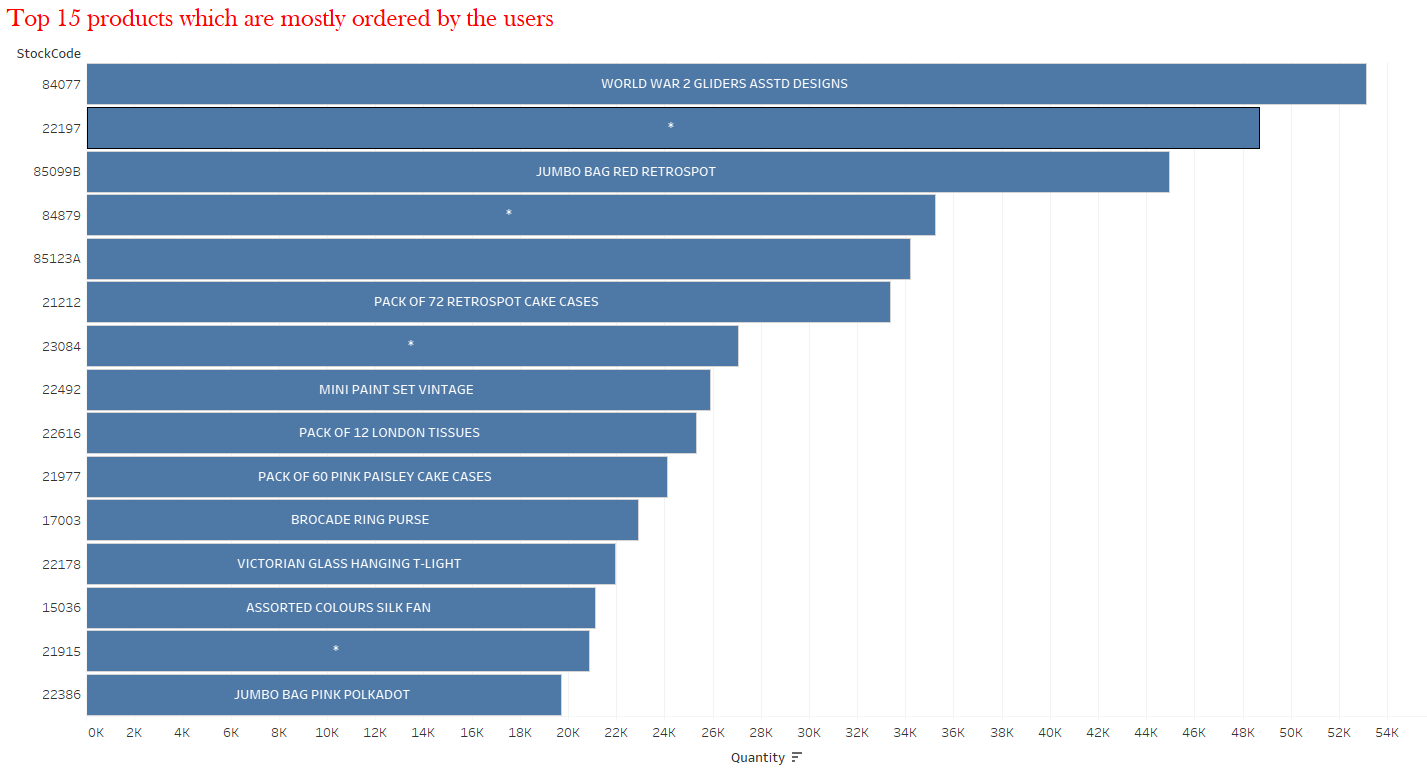

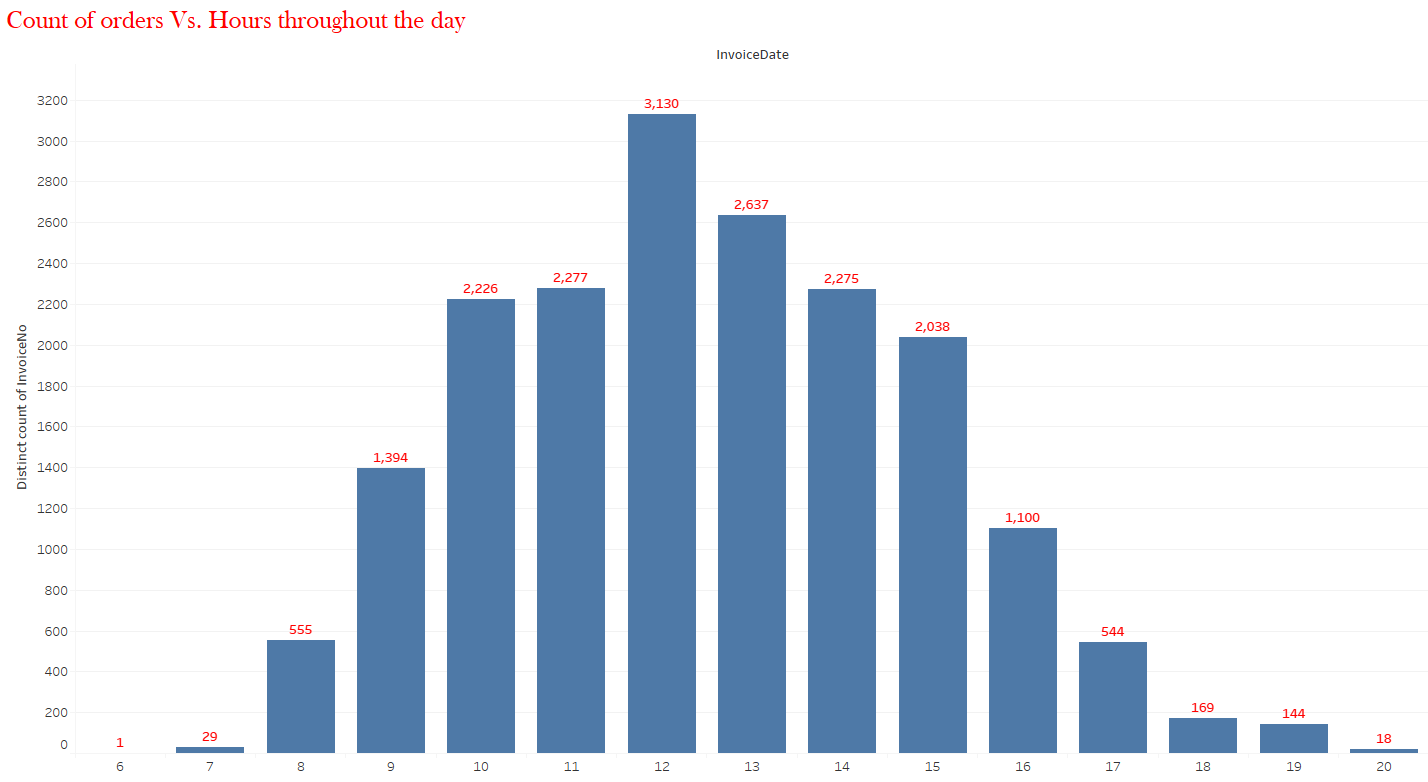

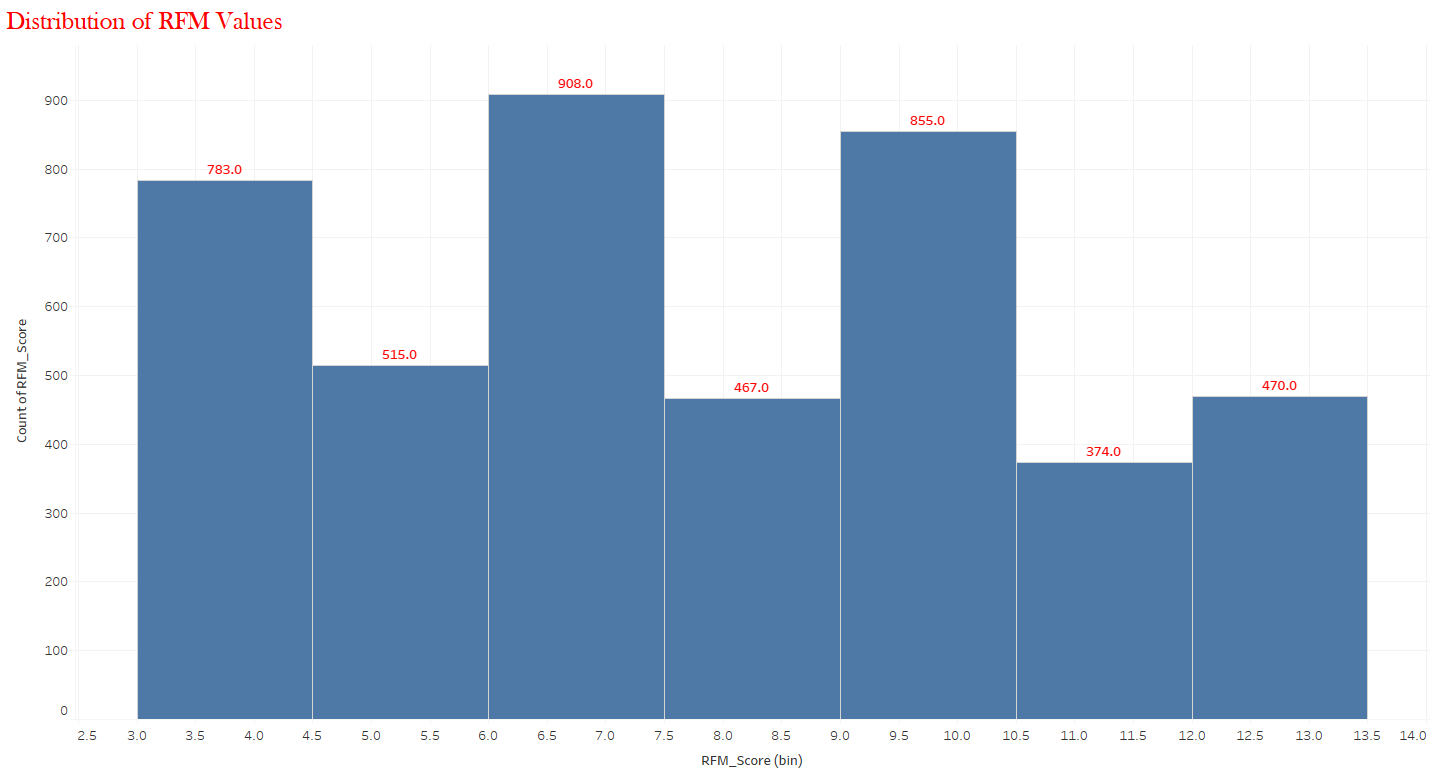

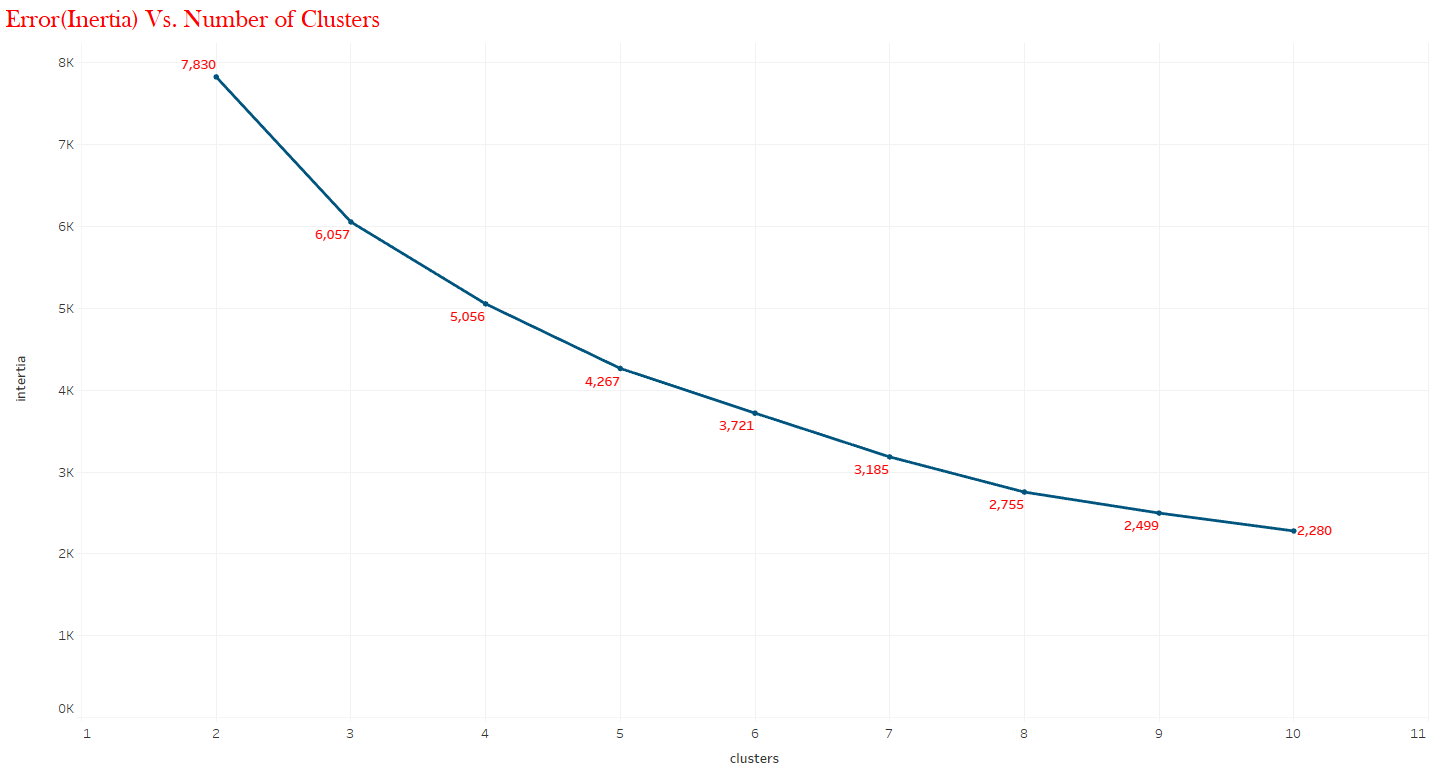

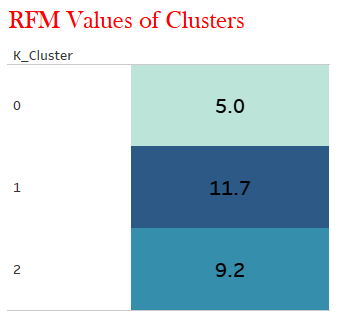

### Screenshot of Dashboard

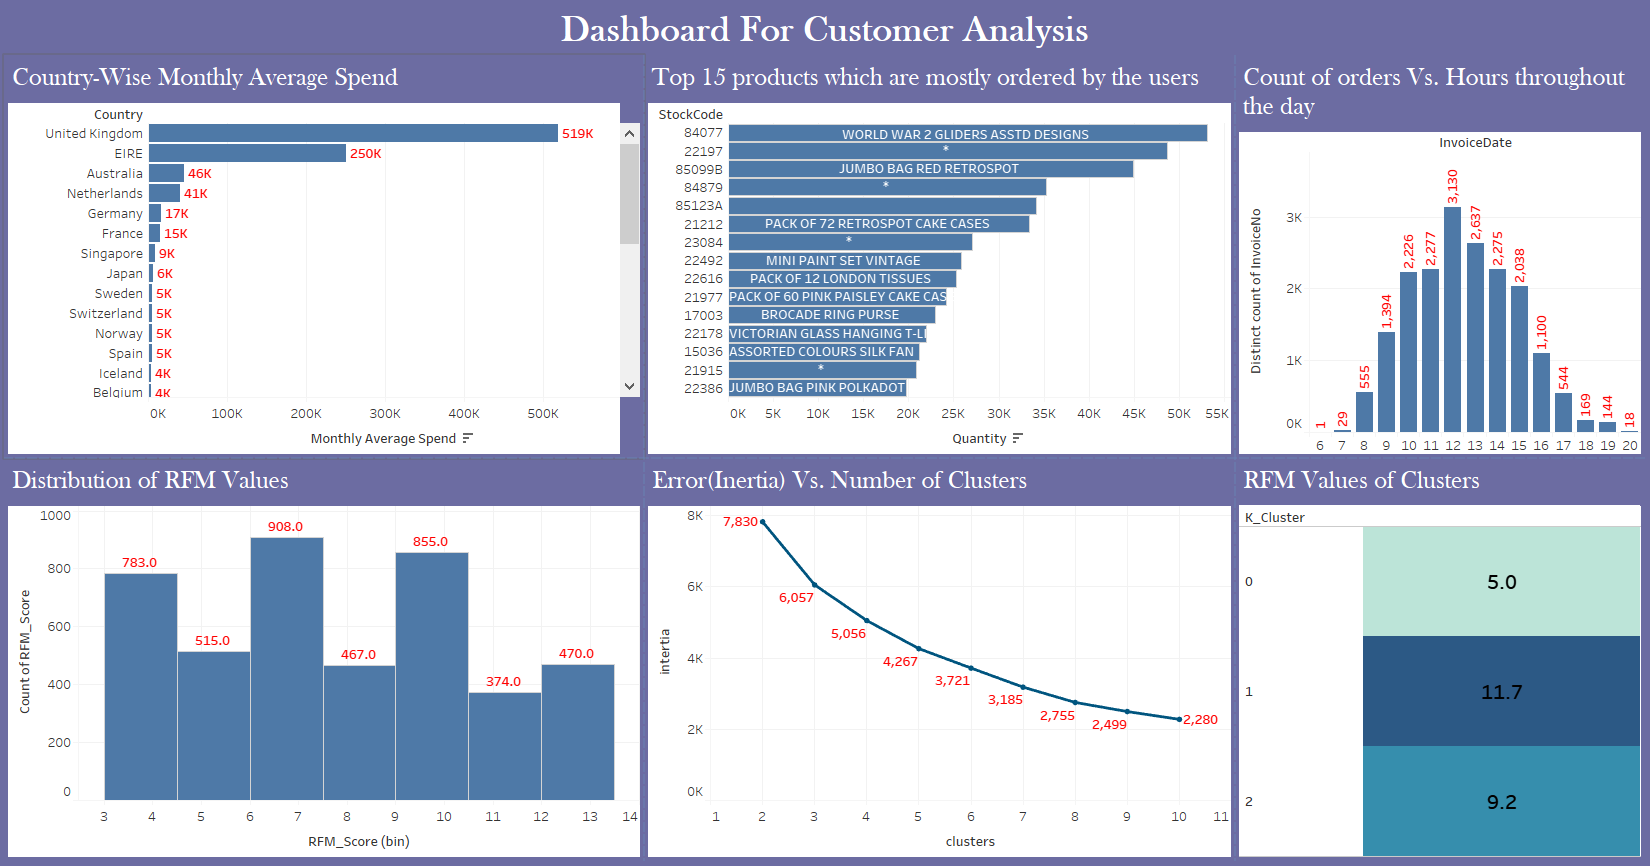

### Thank You